## Importing Dependencies

In [1]:
#data processing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Data

In [2]:
df=pd.read_csv("C:\Datasets\dataset.csv")
print(f"No of rows in the dataset --> {df.shape[0]}")
print(f"No of columns in the dataset --> {df.shape[1]}")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\saksh\AppData\Local\Temp\ipykernel_10372\4088044759.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("C:\Datasets\dataset.csv")


No of rows in the dataset --> 284807
No of columns in the dataset --> 31


In [3]:
df.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking Columns

In [4]:
print("the name of the columns in the dataset are : ")
df.columns

the name of the columns in the dataset are : 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Dropping Non-required Columns

In [5]:
df.drop(["Time"],axis =1,inplace=True)

In [6]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Checking For Null Values 

In [7]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Reducing the sample of 'True Transactions' to its half for balancing the data

In [8]:
df_fraud = df[df.Class==1]
df_true = df[df.Class==0]
df_true = df_true.sample(frac = 0.5)
data = pd.concat([df_true , df_fraud])
data = data.reset_index(drop = True)
data.shape

(142650, 30)

## Checking For Data Types

In [9]:
data['Amount'].describe()

count    142650.000000
mean         88.554036
std         259.481921
min           0.000000
25%           5.550000
50%          21.980000
75%          77.007500
max       25691.160000
Name: Amount, dtype: float64

# Exploratory Data Analysis

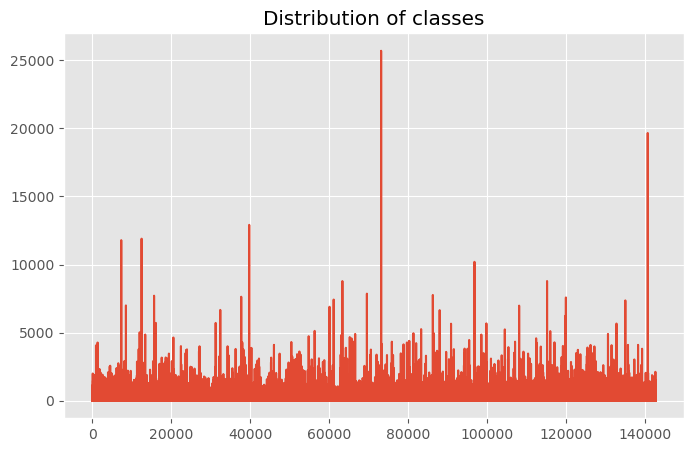

In [10]:
with plt.style.context(('ggplot')):
    plt.figure(figsize = (8,5))
    plt.title("Distribution of classes")
    plt.plot(data["Amount"])
    plt.show()

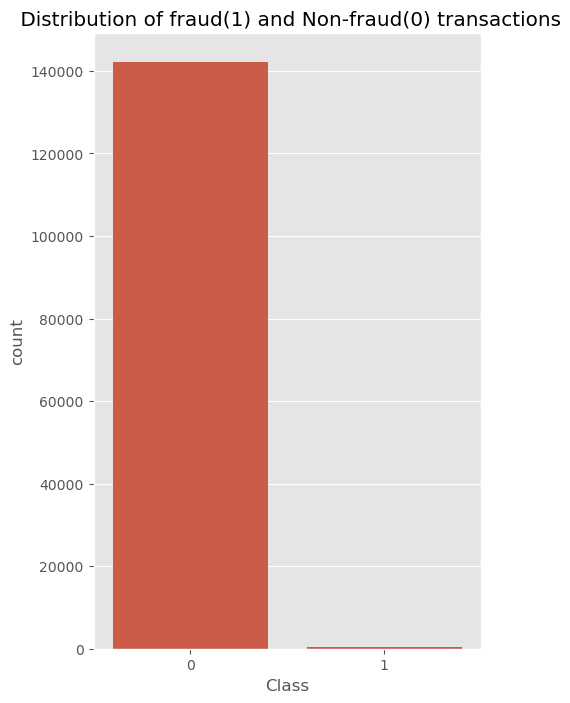

In [11]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(5,8))
    plt.title(" Distribution of fraud(1) and Non-fraud(0) transactions")
    sns.countplot(data = data , x = data["Class"])
    plt.show()

In [12]:
fraud_per = round((len(df[df.Class==1])/len(df[df.Class==0]))*100,2)
print(f"the percentage of Fraudalent Transactions is {fraud_per}%")

the percentage of Fraudalent Transactions is 0.17%


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))

In [14]:
data.Amount

0        -0.174055
1         0.379550
2        -0.279805
3         3.987213
4        -0.248974
            ...   
142645    1.161726
142646   -0.338345
142647   -0.041098
142648    0.602919
142649   -0.177370
Name: Amount, Length: 142650, dtype: float64

## Dropping Duplicates 

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(139581, 30)

# MODELING

## Spliting the dataset

In [17]:
from sklearn.model_selection import train_test_split
x=data.drop(["Class"],axis=1)
y=data["Class"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

## Logistic Regression and its Accuracy

In [18]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(x_train ,y_train)
y_pred_log = model_log.predict(x_test)
print(f"The accuracy of this model is {round(model_log.score(x_test,y_test)*100,2)}%")


The accuracy of this model is 99.85%


## F-1 Score of Logistic Regression & Confusion Matrix

F1-Score of this model is 0.77


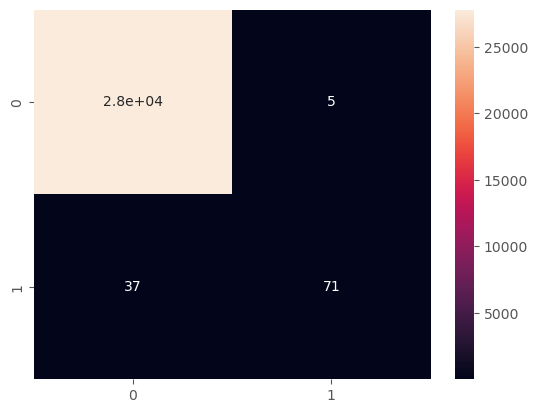

In [19]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print(f"F1-Score of this model is {round(f1_score(y_test , y_pred_log),2)}")
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_pred_log),annot = True)
    plt.show()

## Random Forest and its Accuracy

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_random = model.predict(x_test)
print(f"the accuracy of this model is {round(model.score(x_test,y_test)*100,2)}%")

the accuracy of this model is 99.91%


## Applying Genetic Selection with Logistic Regression to find its Accuracy

In [21]:
! pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV
estimator_log = LogisticRegression()
model_ga_log = GeneticSelectionCV(estimator = estimator_log,cv=5,scoring='accuracy',max_features=6,n_population=60,n_gen_no_change=5)
model_ga_log.fit(x_train , y_train)
y_log_ga = model_ga_log.predict(x_test)

C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [22]:
print(f"the accuracy of this model is {round(model_ga_log.score(x_test , y_test)*100,2)}%")

the accuracy of this model is 99.84%


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


## XGBoost Classifier and its Accuraacy

In [23]:
! pip install xgboost
from xgboost import XGBClassifier
model_xgb = XGBClassifier(max_depth=2)
model_xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)

In [24]:
print(f"the accuracy of this model is{round(model_xgb.score(x_test,y_test)*100,2)}%")

the accuracy of this model is99.91%


In [25]:
print(f"F1-Score of this model is {round(f1_score(y_test , y_pred_xgb),2)}")

F1-Score of this model is 0.88


## Finding best model to predict Fraud using ROC and AUC Curve

In [26]:
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score

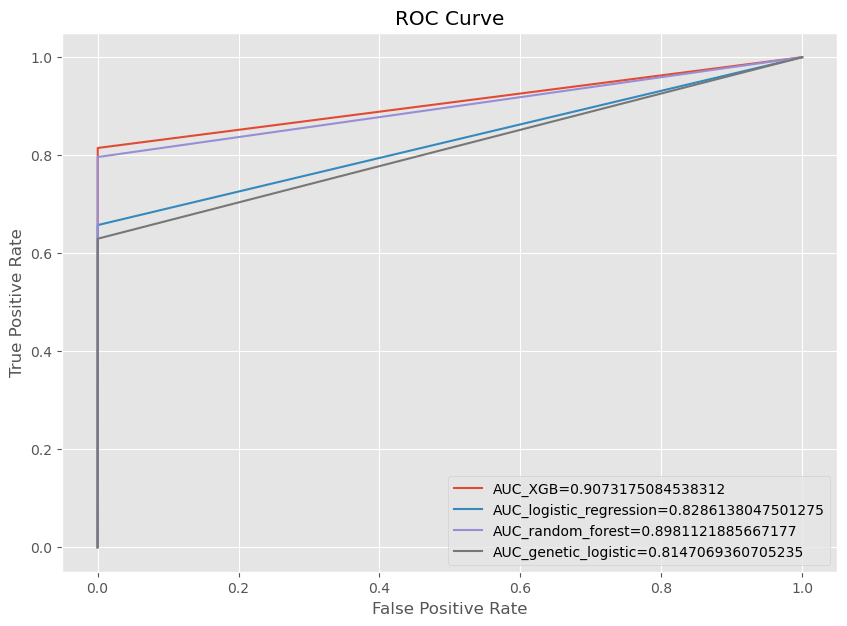

In [27]:
#XGBoost
fpr_xgb , tpr_xgb ,_ = metrics.roc_curve(y_test,y_pred_xgb)
auc_xgb = metrics.roc_auc_score(y_test , y_pred_xgb)
#Logistic regression
fpr_log , tpr_log ,_ = metrics.roc_curve(y_test,y_pred_log)
auc_log = metrics.roc_auc_score(y_test , y_pred_log)
#Random Forest
fpr_ran , tpr_ran ,_ = metrics.roc_curve(y_test,y_pred_random)
auc_ran = metrics.roc_auc_score(y_test , y_pred_random)
#Genetic + Logistic
fpr_log_ga , tpr_log_ga ,_ = metrics.roc_curve(y_test,y_log_ga)
auc_log_ga = metrics.roc_auc_score(y_test , y_log_ga)

with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr_xgb,tpr_xgb,label="AUC_XGB="+str(auc_xgb))
    plt.plot(fpr_log,tpr_log,label="AUC_logistic_regression="+str(auc_log))
    plt.plot(fpr_ran,tpr_ran,label="AUC_random_forest="+str(auc_ran))
    plt.plot(fpr_log_ga,tpr_log_ga,label="AUC_genetic_logistic="+str(auc_log_ga))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    

## Making Prediction Using Most Accurate Model(XGBoost)

In [28]:
y_pred = model_xgb.predict(x_test)

# Display the evaluation results
print(f"Accuracy:- {round(accuracy_score(y_test, y_pred)*100,2)}%")
print(f"Precision:- {round(precision_score(y_test, y_pred, average='macro', zero_division=0)*100,2)}%")
print(f"Recall:- {round(recall_score(y_test, y_pred, average='macro', zero_division=0)*100,2)}%")
print(f"Classification report:- {classification_report(y_test, y_pred)}")

Accuracy:- 99.91%
Precision:- 97.28%
Recall:- 90.73%
Classification report:-               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27809
           1       0.95      0.81      0.88       108

    accuracy                           1.00     27917
   macro avg       0.97      0.91      0.94     27917
weighted avg       1.00      1.00      1.00     27917

